# MICROSOFT MOVIE STUDIO

# 1. Introduction
## Business Understanding
A movie studio is a major entertainment company that makes films. The day-to-day filming operations are generally handled by their production company subsidiary. There are also independently owned studio facilities who have never produced a motion picture of their own because they are not entertainment companies, but they are companies who sell only studio space. 

Microsoft is a major company that wants in on movie creation. Their best bet in getting a return on interest on their new movie studio would be to create movies that are performing well in the box office. The genres with the highest gross in come include: Adventure, Action, Drama, Comedy and Horror. They should avoid genres such as Musicals and Documentaries as these are the least popular among viewers.

## Problem Statement
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Main Objective
To evaluate the performance of movies
## Specific Objecive

## Experimental Design


## Data Understanding
The data we are working with has come from
- (https://www.boxofficemojo.com/)
- (https://www.imdb.com/)
- (https://www.rottentomatoes.com/)
- (https://www.themoviedb.org/)
- (https://www.the-numbers.com/)

# 2. Importing The Libraries

In [63]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Reading The Data

In [64]:
# loading the data from bom movie gross
bom = pd.read_csv("bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [65]:
# loading the budget data
budget = pd.read_csv("tn.movie_budgets.csv")
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [66]:
# loading the data from tmdb movies
tmdb = pd.read_csv("tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [67]:
# loading the data from the imdb title basics
title_basics = pd.read_csv("title.basics.csv")
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [68]:
# loading the data from the imdb name basics
name_basics = pd.read_csv("name.basics.csv")
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [69]:
# loading the data from imdb ratings
title_ratings = pd.read_csv("title.ratings.csv")
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [70]:
# loading the data from the imdb pricipals
title_principals = pd.read_csv("title.principals.csv")
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [71]:
# loading the data from the imdb crew
title_crew = pd.read_csv("title.crew.csv")
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


# 4. External Data Source Validation

In [72]:
name_basics.shape

(606648, 6)

In [73]:
# check for missing values in the name_basics table
name_basics.isnull().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [74]:
# dropping of birth_year and death_year columns from name_basics
name_basics = name_basics.drop(['birth_year', 'death_year'], axis=1)

In [75]:
name_basics.shape

(606648, 4)

In [76]:
# merging title_basics and title_ratings
title_basics_ratings = title_basics.merge(title_ratings, on='tconst')
title_basics_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [77]:
budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [78]:
# checking the number of missing values in title_basics
print(title_basics.isnull().sum())

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [81]:
title_basics.shape

(146144, 6)

In [83]:
title_basics["runtime_minutes"].value_counts(dropna=False)

runtime_minutes
NaN      31739
90.0      7131
80.0      3526
85.0      2915
100.0     2662
         ...  
319.0        1
354.0        1
476.0        1
338.0        1
447.0        1
Name: count, Length: 368, dtype: int64

In [85]:
title_basics_ratings.genres.value_counts()

genres
Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: count, Length: 923, dtype: int64

In [87]:
title_basics_ratings.genres.nunique()

923

In [88]:
# checking each genre of movie and their respective average rating
pd.crosstab(title_basics_ratings.genres, title_basics_ratings.averagerating)

averagerating,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0
genres,,,,,,,,,,,,,,,,,,,,,
Action,0,1,0,0,0,0,1,1,0,1,...,2,2,0,0,0,1,0,1,0,0
"Action,Adult,Comedy",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Animation",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
"Action,Adventure,Biography",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thriller,1,0,0,1,2,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
"Thriller,War",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Thriller,Western",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
title_basics_ratings.runtime_minutes.describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

# 5. Tidying the Dataset

<Axes: xlabel='genres'>

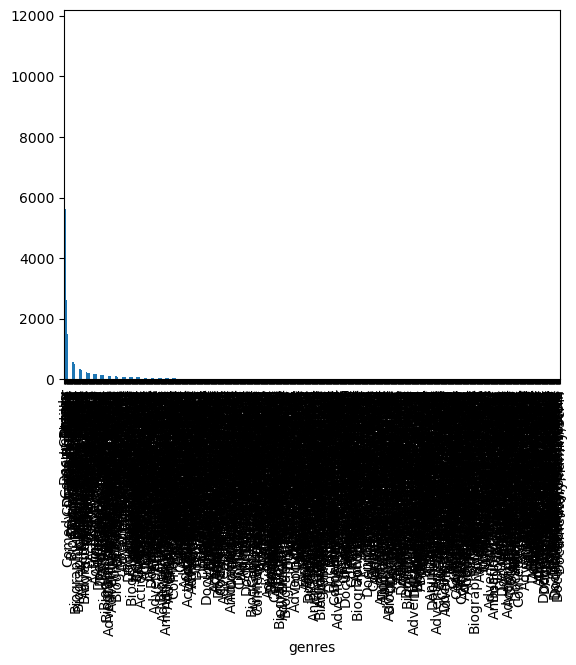

In [91]:
title_basics_ratings.genres.value_counts().plot(kind='bar')

# 6. Exploratory Analysis

# 7. Follow Up Questions